In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
data = Path('/Users/jarl/2d-discharge-nn/data/interpolation_datasets/rec-interpolation2.nc')

In [3]:
ds = xr.open_dataset(data)

In [4]:
ds

<xarray.Dataset>
Dimensions:        (y: 707, x: 200, P: 8, V: 4)
Coordinates:
  * y              (y) float64 0.0 0.001 0.002 0.003 ... 0.703 0.704 0.705 0.706
  * x              (x) float64 0.0 0.001 0.002 0.003 ... 0.196 0.197 0.198 0.199
  * P              (P) float64 5.0 10.0 30.0 45.0 60.0 80.0 100.0 120.0
  * V              (V) float64 200.0 300.0 400.0 500.0
Data variables:
    potential (V)  (V, P, y, x) float64 ...
    Ne (#/m^-3)    (V, P, y, x) float64 ...
    Ar+ (#/m^-3)   (V, P, y, x) float64 ...
    Nm (#/m^-3)    (V, P, y, x) float64 ...
    Te (eV)        (V, P, y, x) float64 ...

In [10]:
ds.sel(V=300, P=5).as_numpy()

<xarray.Dataset>
Dimensions:        (y: 707, x: 200)
Coordinates:
  * y              (y) float64 0.0 0.001 0.002 0.003 ... 0.703 0.704 0.705 0.706
  * x              (x) float64 0.0 0.001 0.002 0.003 ... 0.196 0.197 0.198 0.199
    P              float64 5.0
    V              float64 300.0
Data variables:
    potential (V)  (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    Ne (#/m^-3)    (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    Ar+ (#/m^-3)   (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    Nm (#/m^-3)    (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    Te (eV)        (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan

In [13]:
ds['Ne (#/m^-3)'].sel(V=300, P=5).values

array([[           nan,            nan,            nan, ...,
        6.11676429e-02, 5.74226286e-02, 5.36776143e-02],
       [           nan,            nan,            nan, ...,
        6.51010929e-02, 6.13560786e-02, 5.76110643e-02],
       [           nan,            nan,            nan, ...,
        6.90345429e-02, 6.52895286e-02, 6.15445143e-02],
       ...,
       [1.31431483e+05, 1.31205722e+05, 1.37813983e+05, ...,
                   nan,            nan,            nan],
       [8.77694567e+04, 8.75436957e+04, 8.73179347e+04, ...,
                   nan,            nan,            nan],
       [4.41074309e+04, 4.38816698e+04, 4.36559088e+04, ...,
                   nan,            nan,            nan]])

In [14]:
ne = ds['Ne (#/m^-3)'].sel(V=300, P=5).values
ni = ds['Ar+ (#/m^-3)'].sel(V=300, P=5).values

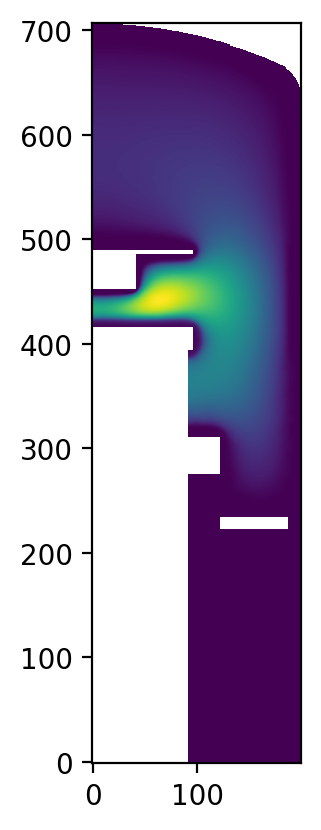

In [16]:
fig, ax = plt.subplots(dpi=200)
ax.imshow(ne, origin='lower')

In [18]:
ds['Ne (#/m^-3)'].sel(V=300, P=5, y=0.44)

<xarray.DataArray 'Ne (#/m^-3)' (x: 200)>
[200 values with dtype=float64]
Coordinates:
    y        float64 0.44
  * x        (x) float64 0.0 0.001 0.002 0.003 0.004 ... 0.196 0.197 0.198 0.199
    P        float64 5.0
    V        float64 300.0

In [19]:
ne_profile = ds['Ne (#/m^-3)'].sel(V=300, P=5, y=0.44).values

In [23]:
ni_profile = ds['Ar+ (#/m^-3)'].sel(V=300, P=5, y=0.44).values

Text(0.5, 0, 'x [mm]')

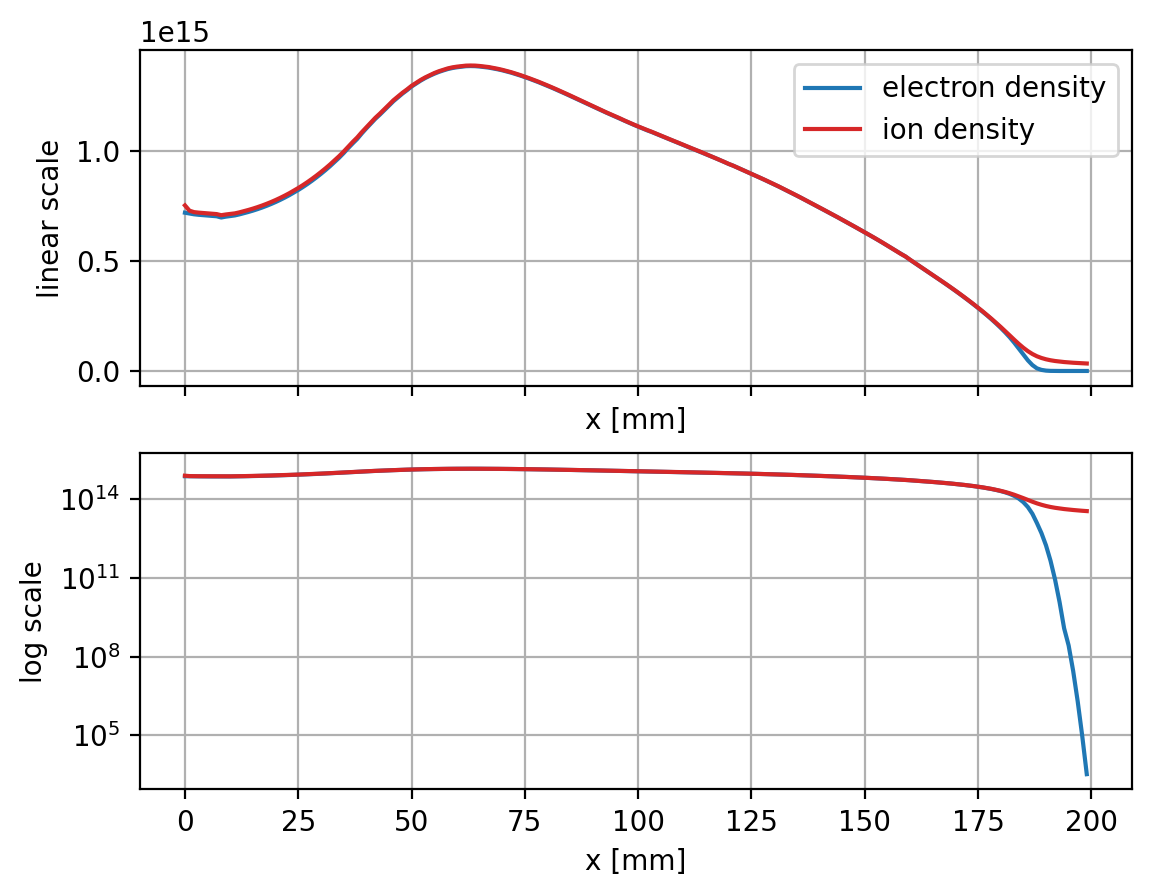

In [30]:
fig, ax = plt.subplots(nrows=2, dpi=200, sharex=True)
ax[0].plot(ne_profile, c='tab:blue', label='electron density')
ax[0].plot(ni_profile, c='tab:red', label='ion density')
ax[0].grid()
ax[0].legend()
ax[0].set_ylabel('linear scale')
ax[0].set_xlabel('x [mm]')

ax[1].plot(ne_profile, c='tab:blue', label='electron density')
ax[1].plot(ni_profile, c='tab:red', label='ion density')
ax[1].grid()
ax[1].set_yscale('log')
ax[1].set_ylabel('log scale')
ax[1].set_xlabel('x [mm]')